In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
#from keras import backend as K
#from keras import regularizers
from pandas.plotting import scatter_matrix
#import argparse
#import os
from keras.losses import mse#, binary_crossentropy

%matplotlib inline

In [61]:
df_atmes = pd.read_csv("americanToadPadraoLimpa.csv")
df_atmess = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

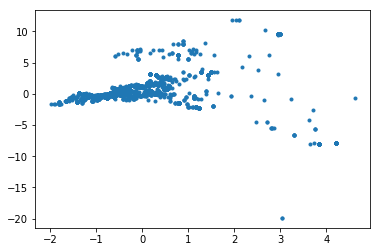

In [62]:
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".")

# Autoencoder

## Base C

In [65]:
df_atmess.drop('Unnamed: 0',axis=1,inplace=True)

In [66]:
cinput_dim = len(df_atmess.columns)
cinput_dim

35

In [67]:
# Rede com somente uma camada escondida para a base em C
cencoding_dim1 = 17
centrada = Input(shape=(cinput_dim,))
cencoded1 = Dense(cencoding_dim1,activation="relu")(centrada)
cdecoded2 = Dense(cinput_dim,activation="linear")(cencoded1)

In [68]:
# Cria o modelo para a rede anteriormente montada
cautoencoder = Model(centrada,cdecoded2)

In [69]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
cautoencoder.compile(optimizer='adam', loss='mse')

In [70]:
# Separa as base de treino e teste
cX_trainAtMes, cX_testAtMes = train_test_split(df_atmess, test_size=0.30, random_state=42)

In [71]:
# Treina a rede
cautoencoder.fit(cX_trainAtMes, cX_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(cX_testAtMes, cX_testAtMes))

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 0s 172us/step - loss: 2.3909 - val_loss: 1.8038
Epoch 2/3000
2572/2572 [==============================] - 0s 12us/step - loss: 2.1290 - val_loss: 1.6215
Epoch 3/3000
2572/2572 [==============================] - 0s 18us/step - loss: 1.9232 - val_loss: 1.4842
Epoch 4/3000
2572/2572 [==============================] - 0s 17us/step - loss: 1.7685 - val_loss: 1.3691
Epoch 5/3000
2572/2572 [==============================] - 0s 21us/step - loss: 1.6331 - val_loss: 1.2698
Epoch 6/3000
2572/2572 [==============================] - 0s 22us/step - loss: 1.5138 - val_loss: 1.1838
Epoch 7/3000
2572/2572 [==============================] - 0s 18us/step - loss: 1.4088 - val_loss: 1.1081
Epoch 8/3000
2572/2572 [==============================] - 0s 19us/step - loss: 1.3153 - val_loss: 1.0385
Epoch 9/3000
2572/2572 [==============================] - 0s 23us/step - loss: 1.2254 - val_loss: 0.9749
Epoch 

Epoch 78/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0816 - val_loss: 0.0817
Epoch 79/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0801 - val_loss: 0.0800
Epoch 80/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0789 - val_loss: 0.0791
Epoch 81/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0774 - val_loss: 0.0775
Epoch 82/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0760 - val_loss: 0.0762
Epoch 83/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0748 - val_loss: 0.0750
Epoch 84/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0736 - val_loss: 0.0739
Epoch 85/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0725 - val_loss: 0.0728
Epoch 86/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0713 - val_loss: 0.0716
Epoch 87/3000
2572/2572 [=====================

Epoch 155/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0346 - val_loss: 0.0351
Epoch 156/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0342 - val_loss: 0.0344
Epoch 157/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0338 - val_loss: 0.0342
Epoch 158/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0334 - val_loss: 0.0338
Epoch 159/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0330 - val_loss: 0.0335
Epoch 160/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0327 - val_loss: 0.0332
Epoch 161/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0325 - val_loss: 0.0330
Epoch 162/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0322 - val_loss: 0.0327
Epoch 163/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0319 - val_loss: 0.0324
Epoch 164/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 14us/step - loss: 0.0204 - val_loss: 0.0211
Epoch 232/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0210
Epoch 233/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0202 - val_loss: 0.0209
Epoch 234/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0201 - val_loss: 0.0208
Epoch 235/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0200 - val_loss: 0.0207
Epoch 236/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0199 - val_loss: 0.0206
Epoch 237/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0198 - val_loss: 0.0206
Epoch 238/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0204 - val_loss: 0.0207
Epoch 239/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0201 - val_loss: 0.0208
Epoch 240/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0148 - val_loss: 0.0160
Epoch 308/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0163 - val_loss: 0.0161
Epoch 309/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0151 - val_loss: 0.0158
Epoch 310/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0147 - val_loss: 0.0157
Epoch 311/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0146 - val_loss: 0.0156
Epoch 312/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0150 - val_loss: 0.0158
Epoch 313/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0147 - val_loss: 0.0155
Epoch 314/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0143 - val_loss: 0.0154
Epoch 315/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0145 - val_loss: 0.0154
Epoch 316/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0117 - val_loss: 0.0130
Epoch 384/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0131
Epoch 385/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0118 - val_loss: 0.0129
Epoch 386/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0115 - val_loss: 0.0129
Epoch 387/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0115 - val_loss: 0.0129
Epoch 388/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0117 - val_loss: 0.0128
Epoch 389/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0115 - val_loss: 0.0127
Epoch 390/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0114 - val_loss: 0.0128
Epoch 391/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0116 - val_loss: 0.0130
Epoch 392/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0099 - val_loss: 0.0113
Epoch 460/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0100 - val_loss: 0.0114
Epoch 461/3000
2572/2572 [==============================] - 0s 34us/step - loss: 0.0105 - val_loss: 0.0117
Epoch 462/3000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0103 - val_loss: 0.0116
Epoch 463/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0101 - val_loss: 0.0114
Epoch 464/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0100 - val_loss: 0.0119
Epoch 465/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0122 - val_loss: 0.0119
Epoch 466/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0105 - val_loss: 0.0116
Epoch 467/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0101 - val_loss: 0.0115
Epoch 468/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0093 - val_loss: 0.0104
Epoch 536/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0093 - val_loss: 0.0105
Epoch 537/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0092 - val_loss: 0.0104
Epoch 538/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0092 - val_loss: 0.0105
Epoch 539/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0098 - val_loss: 0.0109
Epoch 540/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0094 - val_loss: 0.0105
Epoch 541/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0092 - val_loss: 0.0104
Epoch 542/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0092 - val_loss: 0.0104
Epoch 543/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0091 - val_loss: 0.0103
Epoch 544/3000
2572/2572 [===========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0090 - val_loss: 0.0101
Epoch 612/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0089 - val_loss: 0.0099
Epoch 613/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0089 - val_loss: 0.0100
Epoch 614/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0089 - val_loss: 0.0101
Epoch 615/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0092 - val_loss: 0.0100
Epoch 616/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0088 - val_loss: 0.0100
Epoch 617/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0088 - val_loss: 0.0099
Epoch 618/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0088 - val_loss: 0.0099
Epoch 619/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0087 - val_loss: 0.0101
Epoch 620/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 10us/step - loss: 0.0085 - val_loss: 0.0096
Epoch 688/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0085 - val_loss: 0.0096
Epoch 689/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0086 - val_loss: 0.0097
Epoch 690/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0087 - val_loss: 0.0097
Epoch 691/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0085 - val_loss: 0.0096
Epoch 692/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0085 - val_loss: 0.0096
Epoch 693/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0085 - val_loss: 0.0095
Epoch 694/3000
2572/2572 [==============================] - ETA: 0s - loss: 0.008 - 0s 8us/step - loss: 0.0084 - val_loss: 0.0096
Epoch 695/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0086 - val_loss: 0.0096
Epoch 696/3000
2572/2572 [===

2572/2572 [==============================] - 0s 13us/step - loss: 0.0085 - val_loss: 0.0095
Epoch 764/3000
2572/2572 [==============================] - 0s 36us/step - loss: 0.0085 - val_loss: 0.0096
Epoch 765/3000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0087 - val_loss: 0.0095
Epoch 766/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0085 - val_loss: 0.0094
Epoch 767/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0083 - val_loss: 0.0095
Epoch 768/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0086 - val_loss: 0.0098
Epoch 769/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0087 - val_loss: 0.0095
Epoch 770/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0085 - val_loss: 0.0095
Epoch 771/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0083 - val_loss: 0.0096
Epoch 772/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0083 - val_loss: 0.0093
Epoch 840/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0092
Epoch 841/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0084 - val_loss: 0.0094
Epoch 842/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0083 - val_loss: 0.0092
Epoch 843/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0082 - val_loss: 0.0092
Epoch 844/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0081 - val_loss: 0.0091
Epoch 845/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0091
Epoch 846/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0082 - val_loss: 0.0093
Epoch 847/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0082 - val_loss: 0.0099
Epoch 848/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0080 - val_loss: 0.0092
Epoch 916/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0084 - val_loss: 0.0092
Epoch 917/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0091
Epoch 918/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0081 - val_loss: 0.0091
Epoch 919/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0080 - val_loss: 0.0090
Epoch 920/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0080 - val_loss: 0.0091
Epoch 921/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0081 - val_loss: 0.0090
Epoch 922/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0080 - val_loss: 0.0090
Epoch 923/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0081 - val_loss: 0.0091
Epoch 924/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0080 - val_loss: 0.0089
Epoch 992/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0080 - val_loss: 0.0092
Epoch 993/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0088 - val_loss: 0.0098
Epoch 994/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0084 - val_loss: 0.0091
Epoch 995/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0081 - val_loss: 0.0089
Epoch 996/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0083 - val_loss: 0.0094
Epoch 997/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0083 - val_loss: 0.0090
Epoch 998/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0082 - val_loss: 0.0091
Epoch 999/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0081 - val_loss: 0.0092
Epoch 1000/3000
2572/2572 [=========================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0079 - val_loss: 0.0088
Epoch 1068/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0079 - val_loss: 0.0089
Epoch 1069/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0079 - val_loss: 0.0088
Epoch 1070/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0080 - val_loss: 0.0089
Epoch 1071/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0089 - val_loss: 0.0096
Epoch 1072/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0084 - val_loss: 0.0091
Epoch 1073/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0082 - val_loss: 0.0090
Epoch 1074/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0080 - val_loss: 0.0090
Epoch 1075/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0080 - val_loss: 0.0089
Epoch 1076/3000
2572/2572 [=================

Epoch 1143/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0079 - val_loss: 0.0088
Epoch 1144/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0080 - val_loss: 0.0092
Epoch 1145/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0085 - val_loss: 0.0090
Epoch 1146/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0079 - val_loss: 0.0089
Epoch 1147/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0078 - val_loss: 0.0087
Epoch 1148/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0077 - val_loss: 0.0087
Epoch 1149/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0080 - val_loss: 0.0088
Epoch 1150/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0081 - val_loss: 0.0090
Epoch 1151/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0079 - val_loss: 0.0088
Epoch 1152/3000
2572/2572 [=

Epoch 1219/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1220/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0087
Epoch 1221/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0082 - val_loss: 0.0088
Epoch 1222/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0084 - val_loss: 0.0091
Epoch 1223/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0080 - val_loss: 0.0086
Epoch 1224/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1225/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1226/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1227/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0077 - val_loss: 0.0087
Epoch 1228/3000
2572/2572 [=

Epoch 1295/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1296/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1297/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1298/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1299/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1300/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1301/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0077 - val_loss: 0.0087
Epoch 1302/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1303/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0087
Epoch 1304/3000
2572/2572 [=

Epoch 1371/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1372/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 1373/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1374/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 1375/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1376/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1377/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1378/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1379/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1380/3000
2572/2572 [=

Epoch 1447/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0088
Epoch 1448/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0095 - val_loss: 0.0098
Epoch 1449/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0103 - val_loss: 0.0107
Epoch 1450/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0089 - val_loss: 0.0093
Epoch 1451/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0081 - val_loss: 0.0093
Epoch 1452/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0095 - val_loss: 0.0093
Epoch 1453/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0085 - val_loss: 0.0089
Epoch 1454/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0079 - val_loss: 0.0086
Epoch 1455/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1456/3000
2572/2572 [=====

2572/2572 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.0084
Epoch 1524/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1525/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1526/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1527/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1528/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1529/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1530/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1531/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1532/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0081 - val_loss: 0.0088
Epoch 1600/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1601/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0087
Epoch 1602/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1603/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1604/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1605/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0077 - val_loss: 0.0084
Epoch 1606/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1607/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1608/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0087
Epoch 1676/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1677/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1678/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1679/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1680/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 1681/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1682/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 1683/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1684/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 22us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1752/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1753/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1754/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0092
Epoch 1755/3000
2572/2572 [==============================] - 0s 30us/step - loss: 0.0094 - val_loss: 0.0100
Epoch 1756/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0084 - val_loss: 0.0088
Epoch 1757/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1758/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1759/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1760/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1828/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1829/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1830/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1831/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1832/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1833/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0077 - val_loss: 0.0084
Epoch 1834/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1835/3000
2572/2572 [==============================] - ETA: 0s - loss: 0.006 - 0s 21us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1836/3000
2572

Epoch 1903/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1904/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 1905/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1906/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0083
Epoch 1907/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1908/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1909/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 1910/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 1911/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 1912/3000
2572/2572 [=

Epoch 1979/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0083 - val_loss: 0.0088
Epoch 1980/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1981/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1982/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0076 - val_loss: 0.0087
Epoch 1983/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 1984/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 1985/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 1986/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 1987/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0084
Epoch 1988/3000
2572/2572 [==

Epoch 2055/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2056/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2057/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2058/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0083
Epoch 2059/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0083
Epoch 2060/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2061/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2062/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2063/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2064/3000
2572/2572 [===

Epoch 2131/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2132/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2133/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2134/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2135/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2136/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2137/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2138/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2139/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 2140/3000
2572/2572 [========

Epoch 2207/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2208/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 2209/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 2210/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0077 - val_loss: 0.0087
Epoch 2211/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0079 - val_loss: 0.0086
Epoch 2212/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0078 - val_loss: 0.0087
Epoch 2213/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0076 - val_loss: 0.0089
Epoch 2214/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0091 - val_loss: 0.0096
Epoch 2215/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0095 - val_loss: 0.0108
Epoch 2216/3000
2572/2572 [=====

Epoch 2283/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 2284/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2285/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2286/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2287/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2288/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2289/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 2290/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2291/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0079 - val_loss: 0.0085
Epoch 2292/3000
2572/2572 [==

Epoch 2359/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2360/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 2361/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 2362/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0082 - val_loss: 0.0086
Epoch 2363/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0077 - val_loss: 0.0086
Epoch 2364/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2365/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2366/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2367/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2368/3000
2572/2572 [=

Epoch 2435/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2436/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2437/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2438/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0077 - val_loss: 0.0084
Epoch 2439/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2440/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2441/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2442/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2443/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2444/3000
2572/2572 [=

Epoch 2511/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0258 - val_loss: 0.0199
Epoch 2512/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0179 - val_loss: 0.0123
Epoch 2513/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0112 - val_loss: 0.0105
Epoch 2514/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0095 - val_loss: 0.0093
Epoch 2515/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0083 - val_loss: 0.0089
Epoch 2516/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 2517/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 2518/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2519/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2520/3000
2572/2572 [====

2572/2572 [==============================] - 0s 14us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 2588/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2589/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2590/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2591/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2592/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2593/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2594/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2595/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2596/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2664/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0079 - val_loss: 0.0086
Epoch 2665/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0079 - val_loss: 0.0085
Epoch 2666/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2667/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2668/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.0087
Epoch 2669/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.0085
Epoch 2670/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2671/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2672/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 10us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2740/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0077 - val_loss: 0.0084
Epoch 2741/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2742/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2743/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2744/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2745/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2746/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2747/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2748/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0079 - val_loss: 0.0087
Epoch 2816/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0076 - val_loss: 0.0086
Epoch 2817/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0078 - val_loss: 0.0086
Epoch 2818/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2819/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2820/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2821/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2822/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2823/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2824/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2892/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2893/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2894/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2895/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2896/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0089
Epoch 2897/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0109 - val_loss: 0.0124
Epoch 2898/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0101 - val_loss: 0.0088
Epoch 2899/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0080 - val_loss: 0.0091
Epoch 2900/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0077 - val_loss: 0.0085
Epoch 2968/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2969/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2970/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0085
Epoch 2971/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0076 - val_loss: 0.0084
Epoch 2972/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2973/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2974/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2975/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.0084
Epoch 2976/3000
2572/2572 [=================

In [72]:
# Faz a previsão para a base de teste
ctesteAtMes = cautoencoder.predict(cX_testAtMes)

In [73]:
# Calcula o erro (MSE) para o teste
cautoencoder.evaluate(x=cX_testAtMes, y=cX_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 2us/step


0.00845734216272831

In [74]:
# # Calcula o erro (MSE) para o treino
cautoencoder.evaluate(x=cX_trainAtMes, y=cX_trainAtMes, batch_size=attrain_dim)

2572/2572 [==============================] - 0s 1us/step


0.007492473814636469

In [84]:
# Calcula o score (R^2 ajustado) para o teste
r2 = r2_score(cX_testAtMes,ctesteAtMes)
1 - (1-r2) * (len(ctesteAtMes) -1) / (len(ctesteAtMes) - cencoding_dim1 -1)

0.8770202116714088

In [85]:
# Calcula o score (R^2 ajustado) para o treino
ctrainAtMes = cautoencoder.predict(cX_trainAtMes)
r2 = r2_score(cX_trainAtMes,ctrainAtMes)
1 - (1-r2) * (len(ctrainAtMes) -1) / (len(ctrainAtMes) - cencoding_dim1 -1)

0.8899806289404246

In [83]:
# Calcula o score para todas as features separadamente
ctesteAtMes = pd.DataFrame(ctesteAtMes, columns=df_atmess.columns)
cscore = {}
for c in ctesteAtMes.columns:
    cscore[c] = r2_score(cX_testAtMes[c],ctesteAtMes[c])
    # R² ajustado com k igual ao número de neurônios na camada decodificada
    cscore[c] = 1 - (1-cscore[c]) * (len(ctesteAtMes) -1) / (len(ctesteAtMes) - cencoding_dim1 -1)
cscore

{'coolingdegreedays': 0.9999746685214508,
 'date': 0.9998906320314364,
 'fog': 0.534947431105433,
 'gdegreedays': 0.9420648741523272,
 'hail': 0.013929578367794515,
 'heatingdegreedays': 0.989422886593849,
 'humidity': 0.9501216331566456,
 'lat': 0.9998883245827977,
 'lng': 0.9998861434710443,
 'maxdewptm': 0.9734508844125044,
 'maxhumidity': 0.9947229564867539,
 'maxpressurei': 0.996843831122114,
 'maxpressurem': 0.9959823505240523,
 'maxtempm': 0.9919002968808713,
 'maxwspdi': 0.998167976710644,
 'maxwspdm': 0.9984528693761603,
 'meandewptm': 0.9821234750854217,
 'meanpressurei': 0.9939049064366551,
 'meanpressurem': 0.9923854054113332,
 'meantempm': 0.992413643237455,
 'meanwdird': 0.9964718892728232,
 'meanwindspdi': 0.9957562821589308,
 'meanwindspdm': 0.9964194933893393,
 'mindewptm': 0.9450863421971257,
 'minhumidity': 0.9704546615065707,
 'minpressurei': 0.9967252835326318,
 'minpressurem': 0.9962864143574748,
 'mintempm': 0.993927000060716,
 'minwspdi': 0.996888738828904,
 'mi

# Feature Selection

In [86]:
for a in cscore:
    if(cscore[a] < 0.9):
        print(a,cscore[a])

('hail', 0.013929578367794515)
('thunder', 0.26434759211770487)
('snow', -0.02649789786148804)
('fog', 0.534947431105433)
('precipi', 0.2519261623925909)


## Base Limpa

In [63]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [64]:
input_dim = len(df_atmes.columns)
input_dim

24

# Variational Autoencoder

In [ ]:
batch_size = len(df_atmes)
batch_size

In [ ]:
latent_dim = 2

In [ ]:
x = Input(batch_shape=(attrain_dim, input_dim))
h = Dense(encoding_dim1, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(attrain_dim, latent_dim),
                              mean=0.)
    return z_mean + K.exp(z_log_sigma) * epsilon

In [ ]:
# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [ ]:
decoder_h = Dense(encoding_dim1, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [ ]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [ ]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

In [ ]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [ ]:
attrain_dim

In [ ]:
vae.fit(X_trainAtMes, X_trainAtMes,
        shuffle=True,
        epochs=50,
        batch_size=2577,
        validation_data=(X_testAtMes, X_testAtMes))

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()